In [18]:
#buy_computers dataset
#G.THANMAI
#BL.EN.U4CSE21054
#WEDNESDAY (20/09/23)

In [19]:
import numpy as np
import pandas as pd
df = pd.read_excel("lab04.xlsx")
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['income'] = label_encoder.fit_transform(df['income'])
df['student'] = label_encoder.fit_transform(df['student'])
df['credit_rating'] = label_encoder.fit_transform(df['credit_rating'])
df['buys_computer'] = label_encoder.fit_transform(df['buys_computer'])
print(df)

    age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0


In [21]:
val = df['age'].value_counts(normalize=True)
val

1    0.357143
2    0.357143
0    0.285714
Name: age, dtype: float64

In [22]:
#ENTROPY FOR EACH FEATURE
from math import log2
def entropy(df,attribute):
    val = df[attribute].value_counts(normalize=True)
    return -sum(p * log2(p) for p in val)

attributes = df.columns

entropy_values = {}
for a in attributes:
    entropy_val = entropy(df, a)
    entropy_values[a] = entropy_val
    
print(entropy_values)

{'age': 1.5774062828523454, 'income': 1.5566567074628228, 'student': 1.0, 'credit_rating': 0.9852281360342516, 'buys_computer': 0.9402859586706311}


In [23]:
#INFORMATION GAIN FOR EACH FEATURE
def information_gain(df, feature, target_attribute):
    total_entropy = entropy(df, target_attribute)
    values = df[feature].unique()
    weighted_entropy = 0
    
    for value in values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset, target_attribute)
    
    return total_entropy - weighted_entropy

target_attribute = 'buys_computer'
features = df.columns[:-1]

information_gains = {}

for feature in features:
    information_gains[feature] = information_gain(df, feature, target_attribute)

In [24]:
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain:.4f}")

print(f"The first feature for constructing the decision tree (root node) is: {root_node}")

Information Gains:
age: 0.2467
income: 0.0292
student: 0.1518
credit_rating: 0.0481
The first feature for constructing the decision tree (root node) is: age


In [25]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [28]:
#depth of tree
from sklearn.tree import DecisionTreeClassifier
ml_model = DecisionTreeClassifier()
model = ml_model.fit(x_train,y_train)
model.score(x_train, y_train)
print(model.get_depth()) #print the tree depth

3


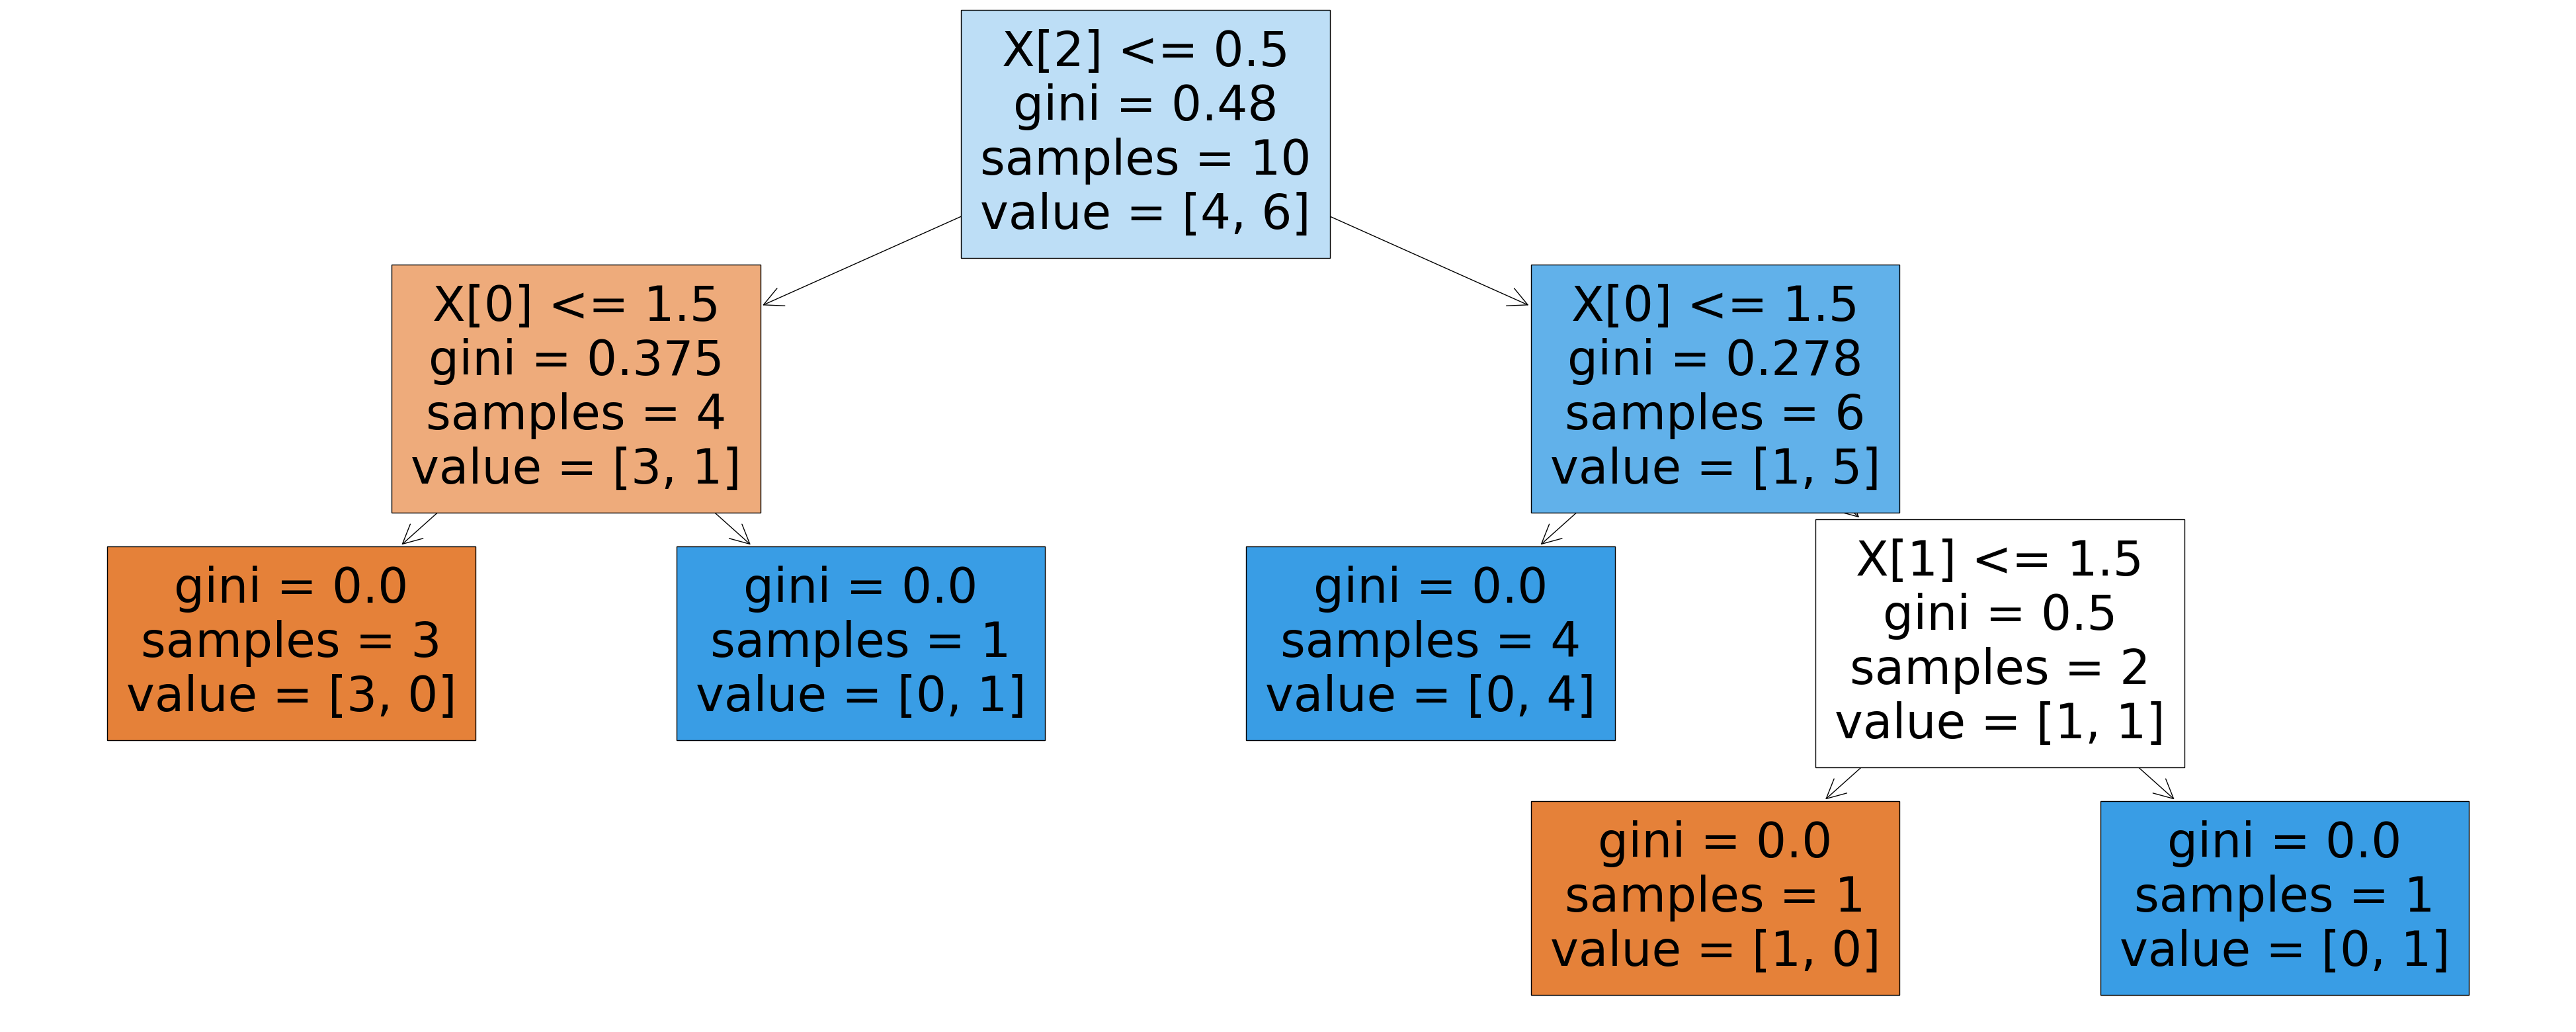

In [29]:
#decision tree classifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,20))
plot_tree(model, filled=True)
plt.show()

In [33]:
df = pd.read_excel('embeddingsdata.xlsx')
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


In [34]:
x = df.iloc[:,0:768]
y = df.iloc[:,768]

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [43]:
#default decision tree classifier accuracies
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
pro_model = DecisionTreeClassifier()
pro_model = pro_model.fit(x_train,y_train)
train_pred = pro_model.predict(x_train)
test_pred = pro_model.predict(x_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(train_accuracy)
print(test_accuracy)

0.997037037037037
0.4711111111111111


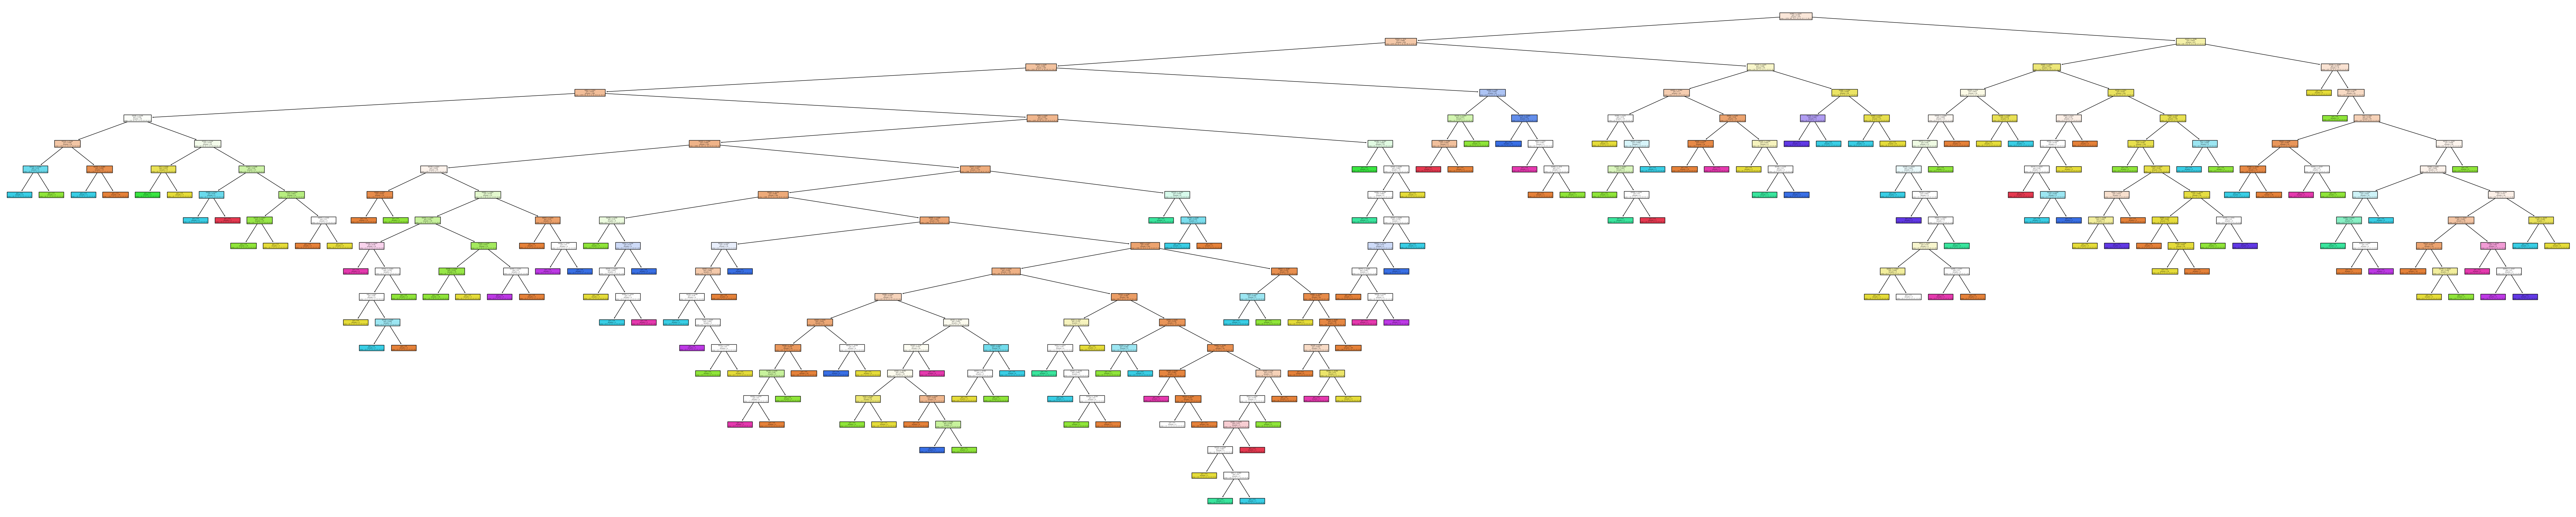

In [48]:
#default decision tree classifier 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(100, 20))
tree.plot_tree(pro_model, filled=True)
plt.show()

In [54]:
#decision tree classifier of depth = 5 
pro_model = DecisionTreeClassifier(max_depth=5)
pro_model = pro_model.fit(x_train,y_train)
train_pred = pro_model.predict(x_train)
test_pred = pro_model.predict(x_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(train_accuracy)
print(test_accuracy)

0.6755555555555556
0.5111111111111111


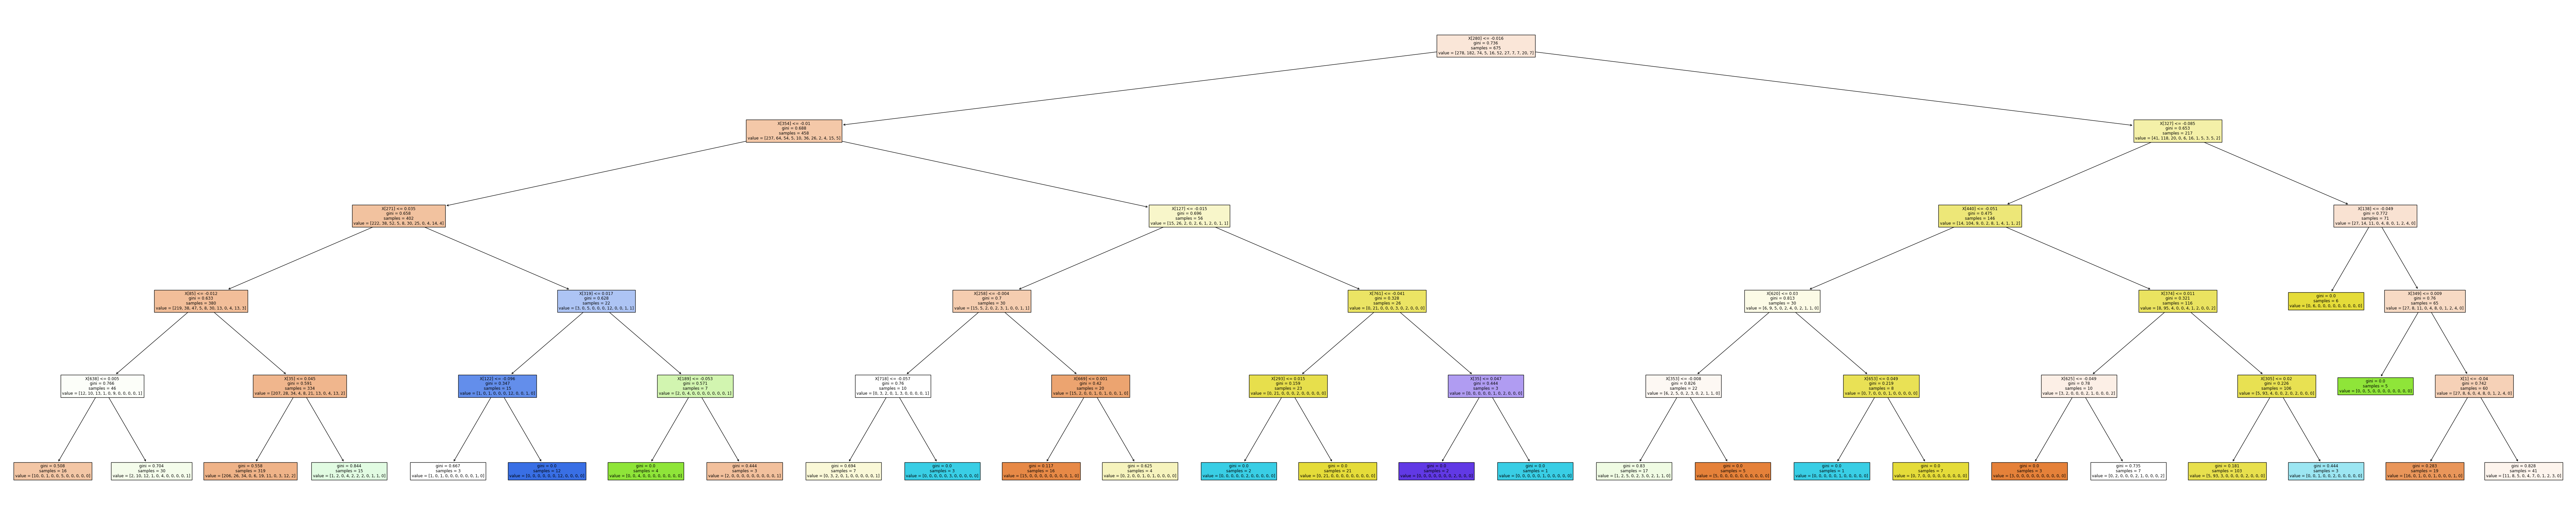

In [55]:
plt.figure(figsize=(100, 20))
tree.plot_tree(pro_model, filled=True)
plt.show()

In [56]:
#decision tree classifier with entropy as criterion 
pro_model = DecisionTreeClassifier(criterion="entropy")
pro_model = pro_model.fit(x_train,y_train)
train_pred = pro_model.predict(x_train)
test_pred = pro_model.predict(x_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(train_accuracy)
print(test_accuracy)

0.997037037037037
0.49777777777777776


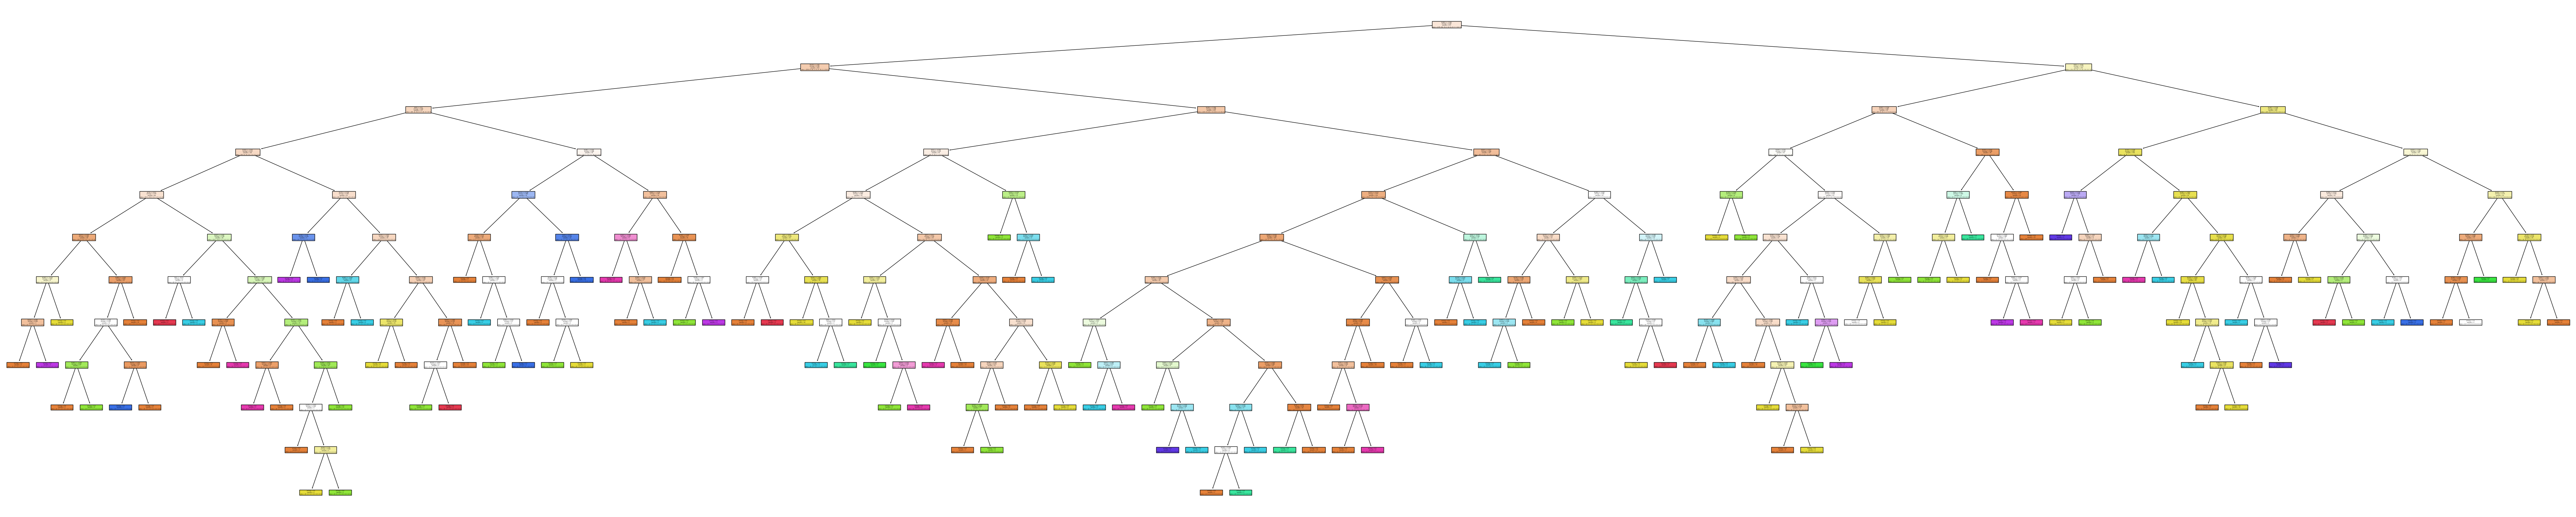

In [57]:
plt.figure(figsize=(100, 20))
tree.plot_tree(pro_model, filled=True)
plt.show()